In [20]:
from typing import Callable
from dataclasses import dataclass
from evaluation.eval_analysis import (
    find_shared_proofs,
    EvalDict,
    PlotInfo,
    time_key,
    expanded_key,
    get_combined_num_proofs_by_metric,
    SuccessMetric,
    LengthRange,
)
import numpy as np
import matplotlib.pyplot as plt

In [21]:
EVAL_DIRS = [
    ("Finetuned full dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split"),
    ("Finetuned 15% dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split-rnd-samp-15-pct"),
    ("Finetuned 8% dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split-rnd-samp-8-pct"),
    ("Finetuned 8% dataset w/ tpe", "/home/ubuntu/coq-modeling/evals/codellama-7b-tpe-1k-rnd-split-rnd-samp-8-pct"),
]

In [22]:
eval_dirs = [b for _, b in EVAL_DIRS]
shared_proof_names = find_shared_proofs(eval_dirs)

In [23]:
eval_dicts = [EvalDict.from_shared_proofs(e, p, shared_proof_names) for e, p in EVAL_DIRS]

In [24]:

def get_matching_x_axes(
    eval_dicts: list[EvalDict], metric: SuccessMetric
) -> tuple[list[PlotInfo], PlotInfo]:
    plot_infos = [ed.get_num_proofs_by_metric(metric) for ed in eval_dicts]
    max_metric = max([p.xs[-1] for p in plot_infos])

    for plot_info in plot_infos:
        if plot_info.xs[-1] != max_metric:
            plot_info.xs.append(max_metric)
            plot_info.ys.append(plot_info.ys[-1])
    
    combined_plot_info = get_combined_num_proofs_by_metric(eval_dicts, metric)
    if combined_plot_info.xs[-1] != max_metric:
        combined_plot_info.xs.append(max_metric)
        combined_plot_info.ys.append(combined_plot_info.ys[-1])

    return plot_infos, combined_plot_info 


  

Text(0.5, 1.0, '# Proofs found out of 159 Theorems.')

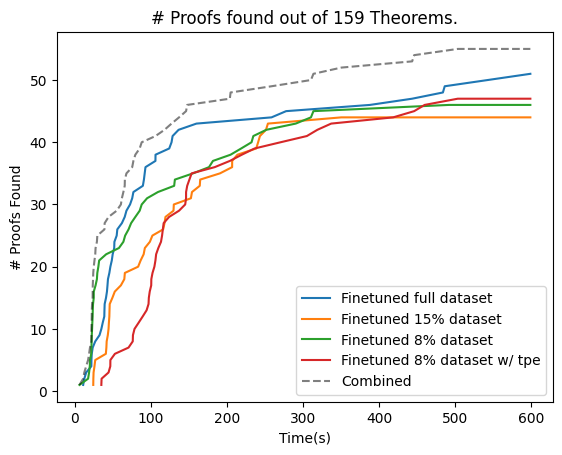

In [25]:
fig, ax = plt.subplots()
assert type(ax) == plt.Axes

plot_infos, combined_plot_info = get_matching_x_axes(eval_dicts, time_key)

for plot_info in plot_infos: 
    ax.plot(plot_info.xs, plot_info.ys, label=plot_info.name)

ax.plot(combined_plot_info.xs, combined_plot_info.ys, "--", label=combined_plot_info.name, color="black", alpha=0.5,)

ax.legend()
ax.set_xlabel("Time(s)")
ax.set_ylabel("# Proofs Found")
ax.set_title(f"# Proofs found out of {len(shared_proof_names)} Theorems.")


In [26]:
plot_infos

[PlotInfo(xs=[11.376307753, 12.875208973, 15.309219626, 22.11222261, 22.232527776, 22.653604619, 23.887366829, 27.248835366, 32.850546656, 35.264544913, 37.067472755, 39.118640123, 39.318902635, 39.588955964, 41.354621384, 42.607674679, 43.303833167, 43.928898286, 45.762307892, 47.089427083, 48.952611754, 50.125615887, 52.129124978, 52.391509625, 55.381630592, 56.20268159, 62.204465684, 65.931763054, 68.191700706, 72.916483206, 75.756902098, 77.320594723, 89.75817852, 91.144206269, 92.148978104, 93.17202753, 106.257793024, 106.372685929, 124.36172982, 127.407986947, 128.793742291, 136.661372675, 160.111029282, 258.684736338, 277.815394826, 387.859496102, 443.304728258, 483.684324422, 486.074241036, 542.458175989, 598.510316989], ys=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], name='Finetuned full dataset'),
 PlotInfo(xs=[24.619546869, 2

Text(0.5, 1.0, '# Proofs Found out of 159 Theorems.')

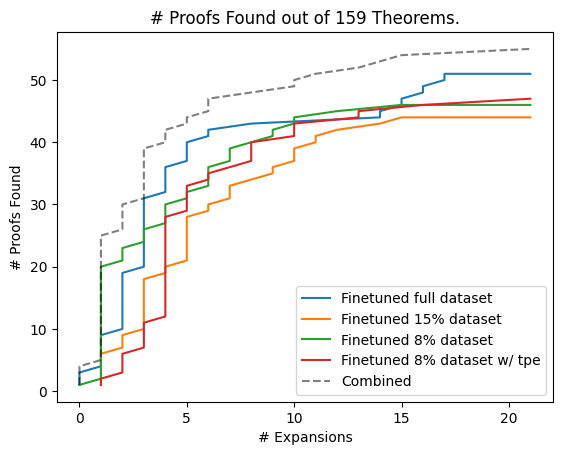

In [27]:
fig, ax = plt.subplots()
assert type(ax) == plt.Axes

plot_infos, combined_plot_info = get_matching_x_axes(eval_dicts, expanded_key)

for plot_info in plot_infos: 
    ax.plot(plot_info.xs, plot_info.ys, label=plot_info.name)

ax.plot(combined_plot_info.xs, combined_plot_info.ys, "--", label=combined_plot_info.name, color="black", alpha=0.5,)


ax.legend()
ax.set_xlabel("# Expansions")
ax.set_ylabel("# Proofs Found")
ax.set_title(f"# Proofs Found out of {len(shared_proof_names)} Theorems.")

In [60]:
ranges = [
    LengthRange(0, 5),
    LengthRange(6, 10),
    LengthRange(11, 2000),
]

In [61]:
from importlib import reload
from evaluation import eval_analysis
reload(eval_analysis)
from evaluation.eval_analysis import (
    find_shared_proofs,
    EvalDict,
    PlotInfo,
    time_key,
    expanded_key,
    get_combined_num_proofs_by_metric,
    SuccessMetric,
    LengthRange,
)

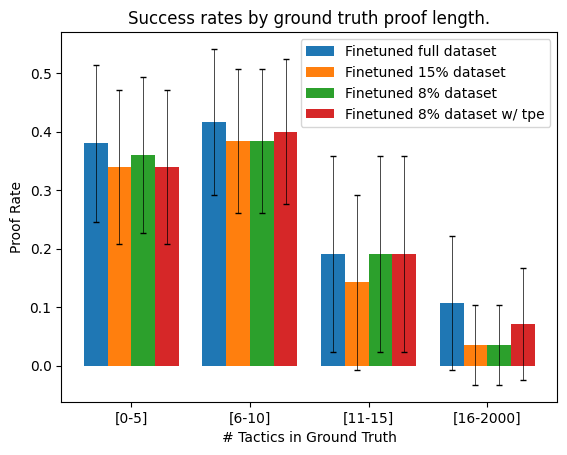

In [62]:
rates_by_eval = [e.get_proof_rate_by_length(ranges) for e in eval_dicts] 
fig, ax = plt.subplots()

bar_width = 0.8 / len(rates_by_eval)
xs = np.arange(len(ranges))
for i, (eval_dict, rates) in enumerate(zip(eval_dicts, rates_by_eval)):
    shift_factor = bar_width * (i - (len(rates_by_eval) // 2))
    if len(rates_by_eval) % 2 == 0:
        shift_factor += bar_width / 2
    
    plot_xs = xs + shift_factor
    plot_ys = [r.rate() for r in rates]
    plot_errs = [r.margin() for r in rates]

    ax.errorbar(plot_xs, plot_ys, yerr=plot_errs, fmt="none", ecolor="black", capsize=2, elinewidth=0.5)
    ax.bar(plot_xs, plot_ys, bar_width, label=eval_dict.eval_name)

ax.set_title("Success rates by ground truth proof length.")
ax.set_xticks(xs)
ax.set_xticklabels([r.label() for r in ranges])
ax.set_xlabel("# Tactics in Ground Truth")
ax.set_ylabel("Proof Rate")
ax.legend()


In [58]:
import math
1.96 * math.sqrt((2 / 8) * (6 / 8) / 8)

0.3000624934909393

In [63]:
[(r, r.margin()) for r in eval_dicts[0].get_proof_rate_by_length(ranges)]

[(Successes: 19, Attempts: 50, 0.13454225804556721),
 (Successes: 25, Attempts: 60, 0.12474789391824231),
 (Successes: 4, Attempts: 21, 0.16795061002392161),
 (Successes: 3, Attempts: 28, 0.114564392373896)]